In [2]:
from openbb_terminal.sdk import openbb
import quantstats as qs
qs.extend_pandas()

In [5]:
#load data from openBB
data_spy = openbb.stocks.load("SPY", start_date="2013-01-13", end_date="2023-01-13")
data_qqq = openbb.stocks.load("QQQ", start_date="2013-01-13", end_date="2023-01-13")
data_aapl = openbb.stocks.load("AAPL", start_date="2013-01-13", end_date="2023-01-13")
data_amzn = openbb.stocks.load("AMZN", start_date="2013-01-13", end_date="2023-01-13")
data_goog = openbb.stocks.load("GOOG", start_date="2013-01-13", end_date="2023-01-13")
data_msft = openbb.stocks.load("MSFT", start_date="2013-01-13", end_date="2023-01-13")

Loading Daily data for SPY with starting period 2013-01-14.

Loading Daily data for QQQ with starting period 2013-01-14.

Loading Daily data for AAPL with starting period 2013-01-14.

Loading Daily data for AMZN with starting period 2013-01-14.

Loading Daily data for GOOG with starting period 2013-01-14.

Loading Daily data for MSFT with starting period 2013-01-14.

In [4]:
#data check
data_msft.tail()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2023-01-06,223.000000,225.759995,219.350006,224.929993,224.929993,43597700
2023-01-09,226.449997,231.240005,226.410004,227.119995,227.119995,27369800
2023-01-10,227.759995,231.309998,227.330002,228.850006,228.850006,27033900
2023-01-11,231.289993,235.949997,231.110001,235.770004,235.770004,28669300
2023-01-12,235.259995,239.899994,233.559998,238.509995,238.509995,27269500


In [5]:
#use adjust close to calc daily returns
spy_returns = data_spy["Adj Close"].pct_change()
qqq_returns = data_qqq["Adj Close"].pct_change()
aapl_returns = data_aapl["Adj Close"].pct_change()
amzn_returns = data_amzn["Adj Close"].pct_change()
goog_returns = data_goog["Adj Close"].pct_change()
msft_returns = data_msft["Adj Close"].pct_change()

In [6]:
#check data
spy_returns.head()

date
2013-01-14         NaN
2013-01-15    0.000680
2013-01-16   -0.000136
2013-01-17    0.006460
2013-01-18    0.002230
Name: Adj Close, dtype: float64

In [7]:
#now look at metrics comparison of msft(strategy) to spy (benchmark)
qs.reports.metrics(msft_returns, spy_returns, mode="full")

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-14  2013-01-14
End Period                 2023-01-12  2023-01-12
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          975.69%     225.21%
CAGR﹪                     26.81%      12.52%

Sharpe                     1.01        0.77
Prob. Sharpe Ratio         99.93%      99.13%
Smart Sharpe               0.89        0.67
Sortino                    1.49        1.07
Smart Sortino              1.3         0.93
Sortino/√2                 1.06        0.75
Smart Sortino/√2           0.92        0.66
Omega                      1.21        1.21

Max Drawdown               -37.15%     -33.72%
Longest DD Days            416         373
Volatility (ann.)          27.09%      17.39%
R^2                        0.6         0.6
Information Ratio          0.05        0.05
Calmar                     0.72       

In [9]:
#looking at plots of msft vs benchmark

#qs.reports.plots(msft_returns, spy_returns, mode="full", figsize=(15,10))

In [18]:
# example of weighted portfolio
portfolio = (msft_returns* .25) + (aapl_returns*.25) + (amzn_returns*.25) + (goog_returns*.25)
portfolio.head()

date
2013-01-14         NaN
2013-01-15   -0.005092
2013-01-16    0.002726
2013-01-17    0.000345
2013-01-18   -0.002210
Name: Adj Close, dtype: float64

In [19]:
#metrics for the weighted portfolio vs spy(benchmark)
qs.reports.metrics(portfolio, spy_returns, mode="full")

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-14  2013-01-14
End Period                 2023-01-12  2023-01-12
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          761.53%     225.21%
CAGR﹪                     24.03%      12.52%

Sharpe                     1.01        0.77
Prob. Sharpe Ratio         99.93%      99.13%
Smart Sharpe               0.92        0.7
Sortino                    1.46        1.07
Smart Sortino              1.33        0.97
Sortino/√2                 1.03        0.75
Smart Sortino/√2           0.94        0.69
Omega                      1.2         1.2

Max Drawdown               -39.03%     -33.72%
Longest DD Days            395         373
Volatility (ann.)          24.3%       17.39%
R^2                        0.7         0.7
Information Ratio          0.05        0.05
Calmar                     0.62        0

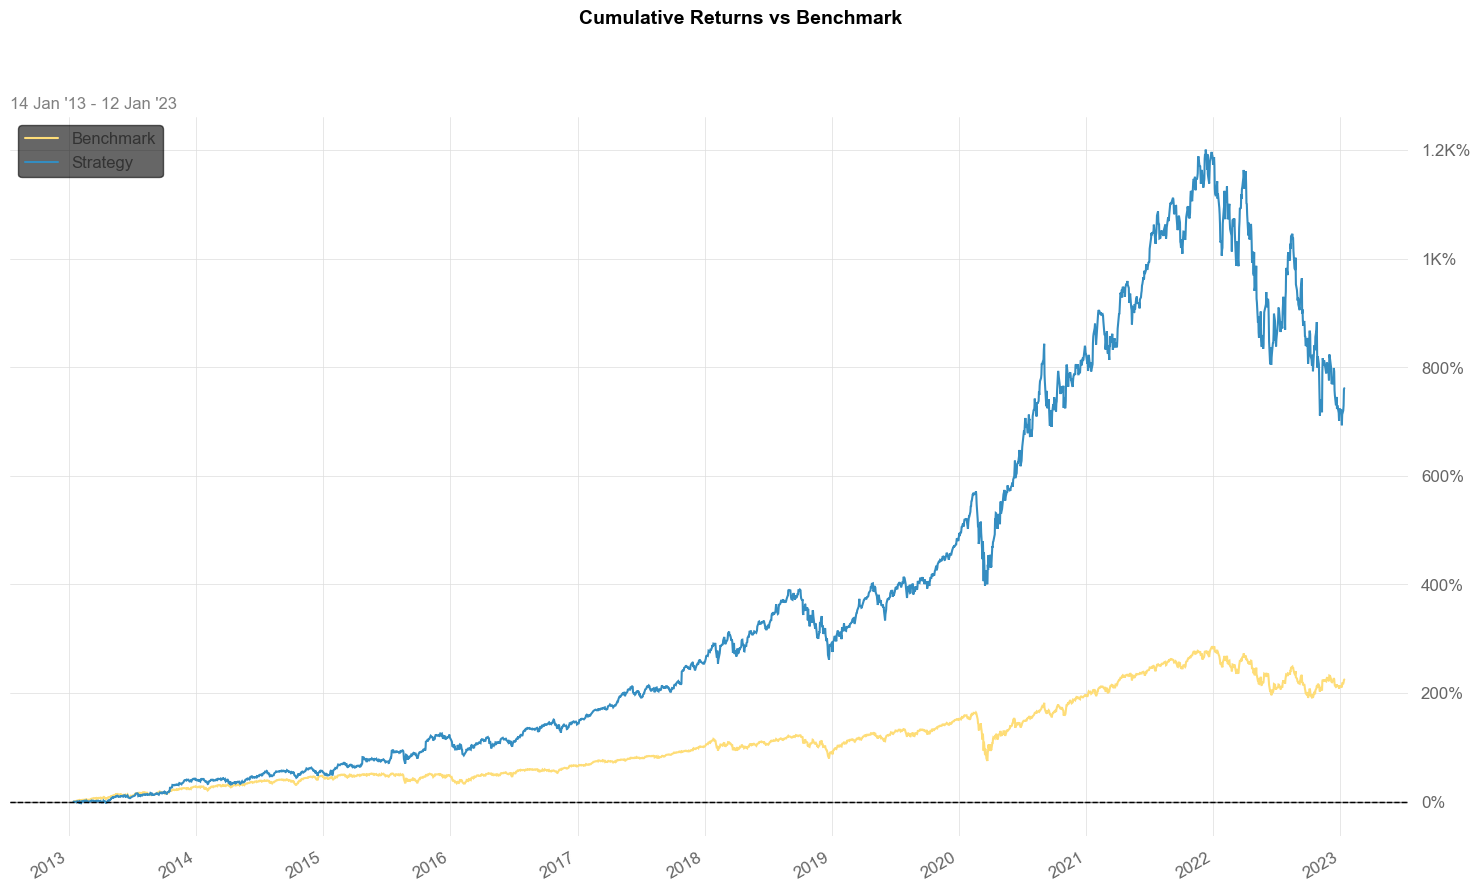

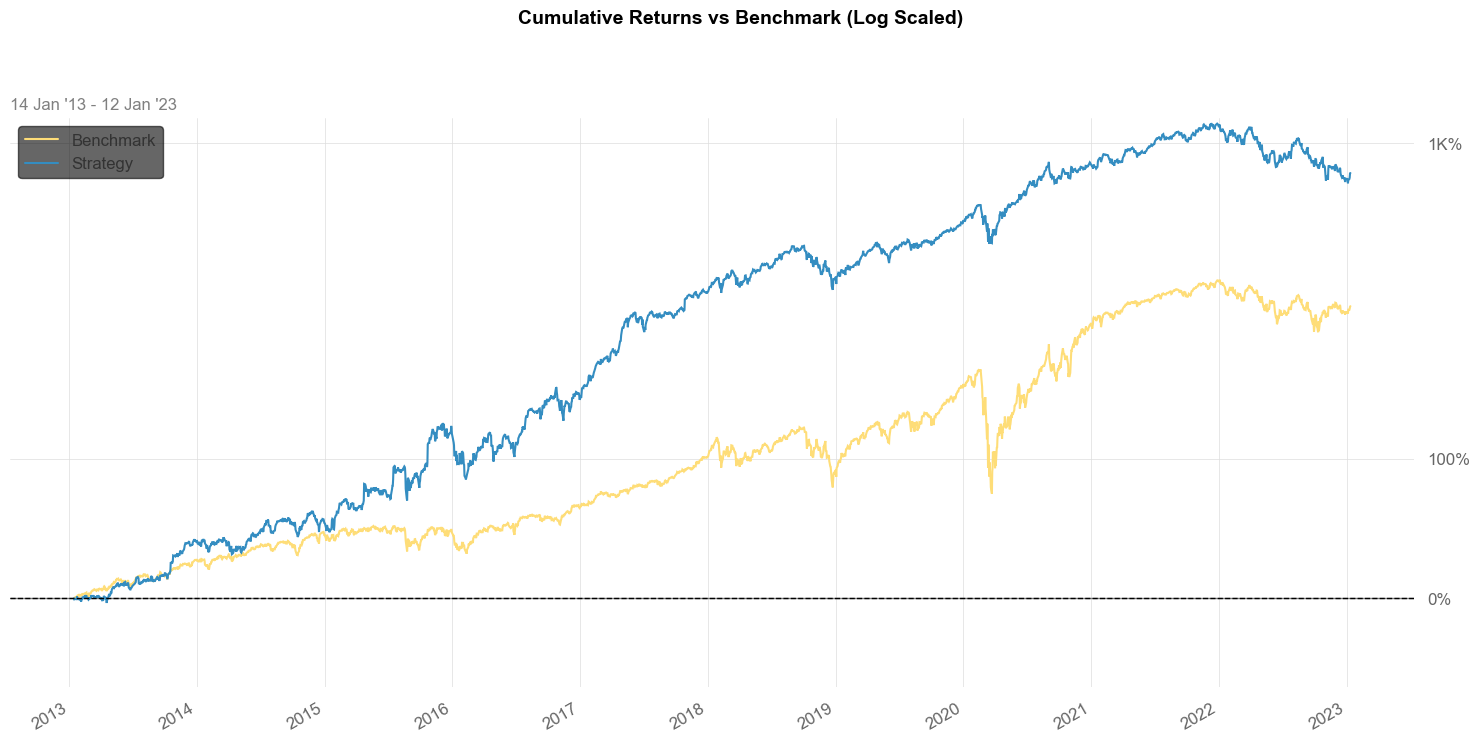

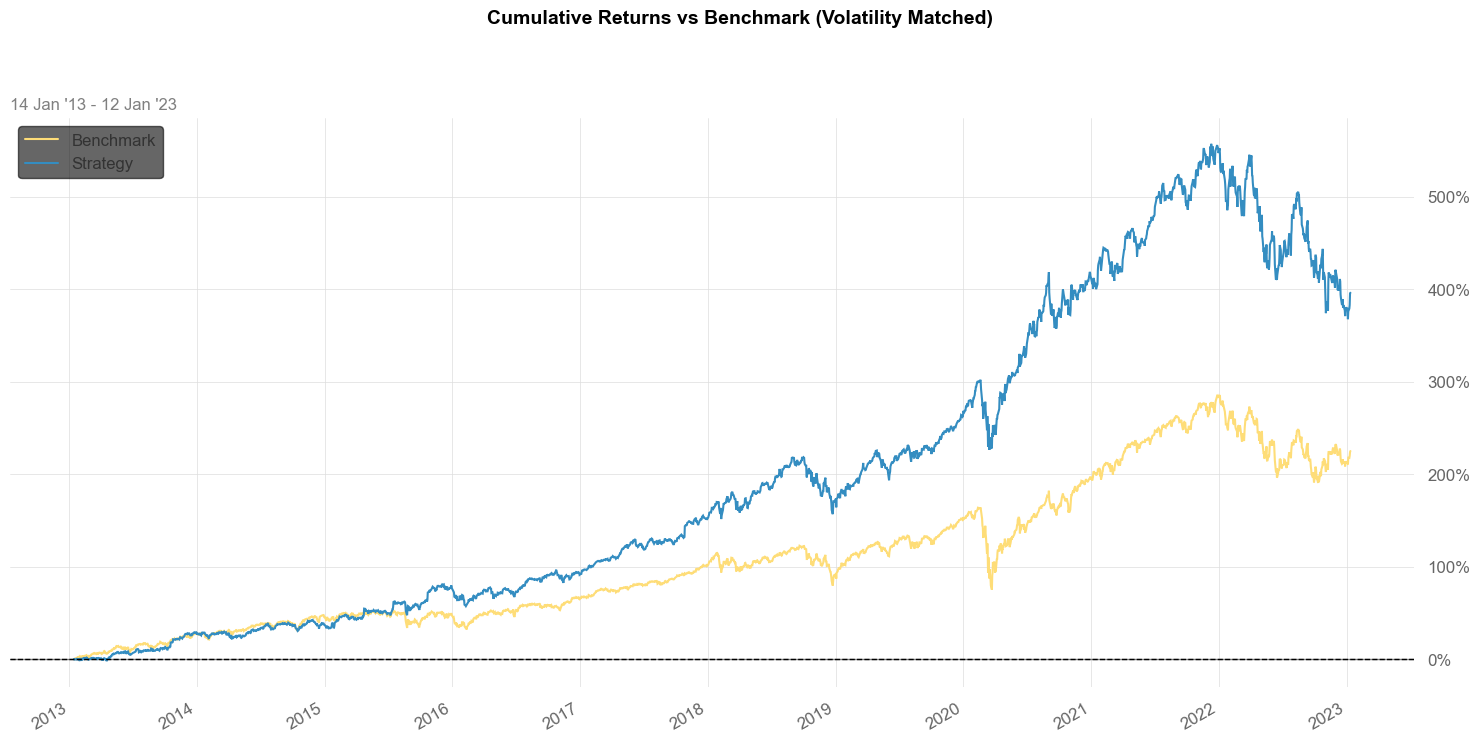

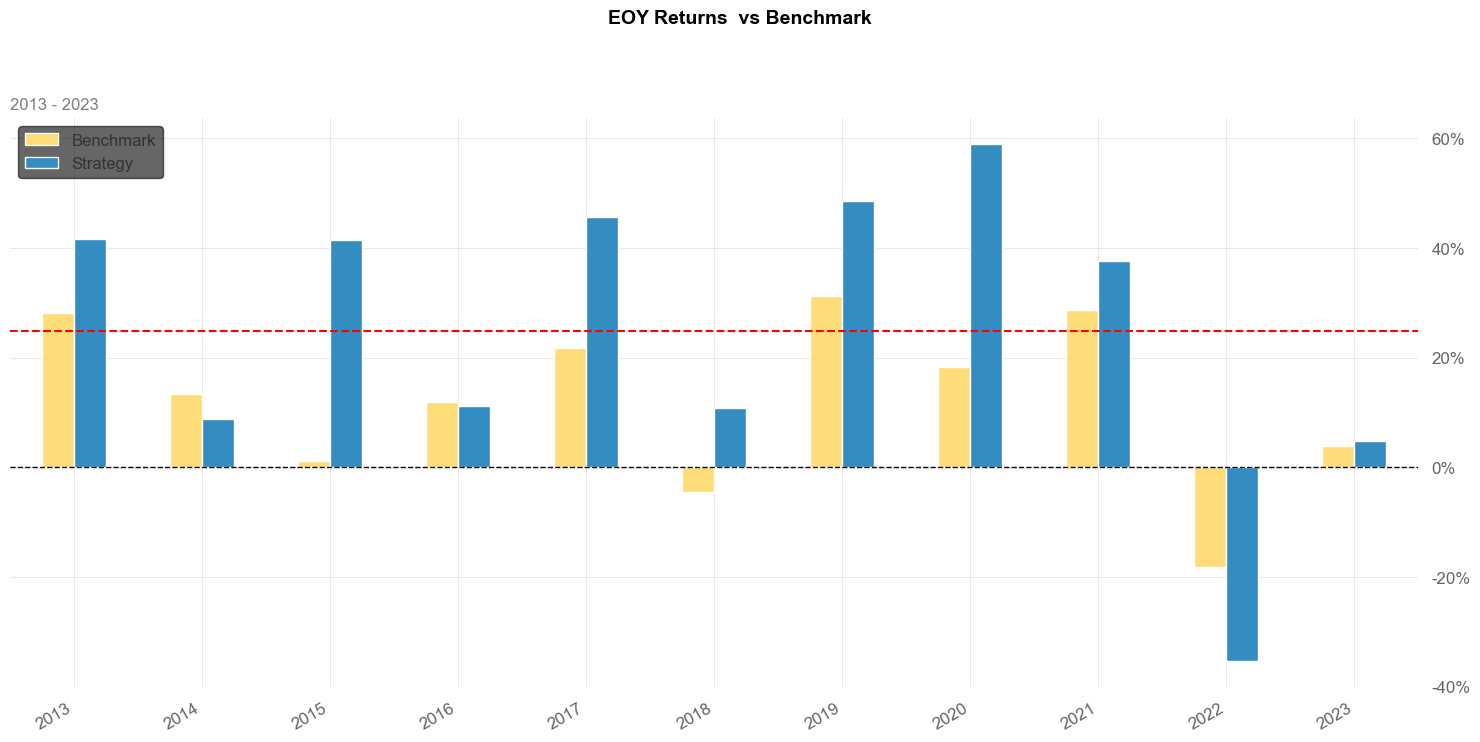

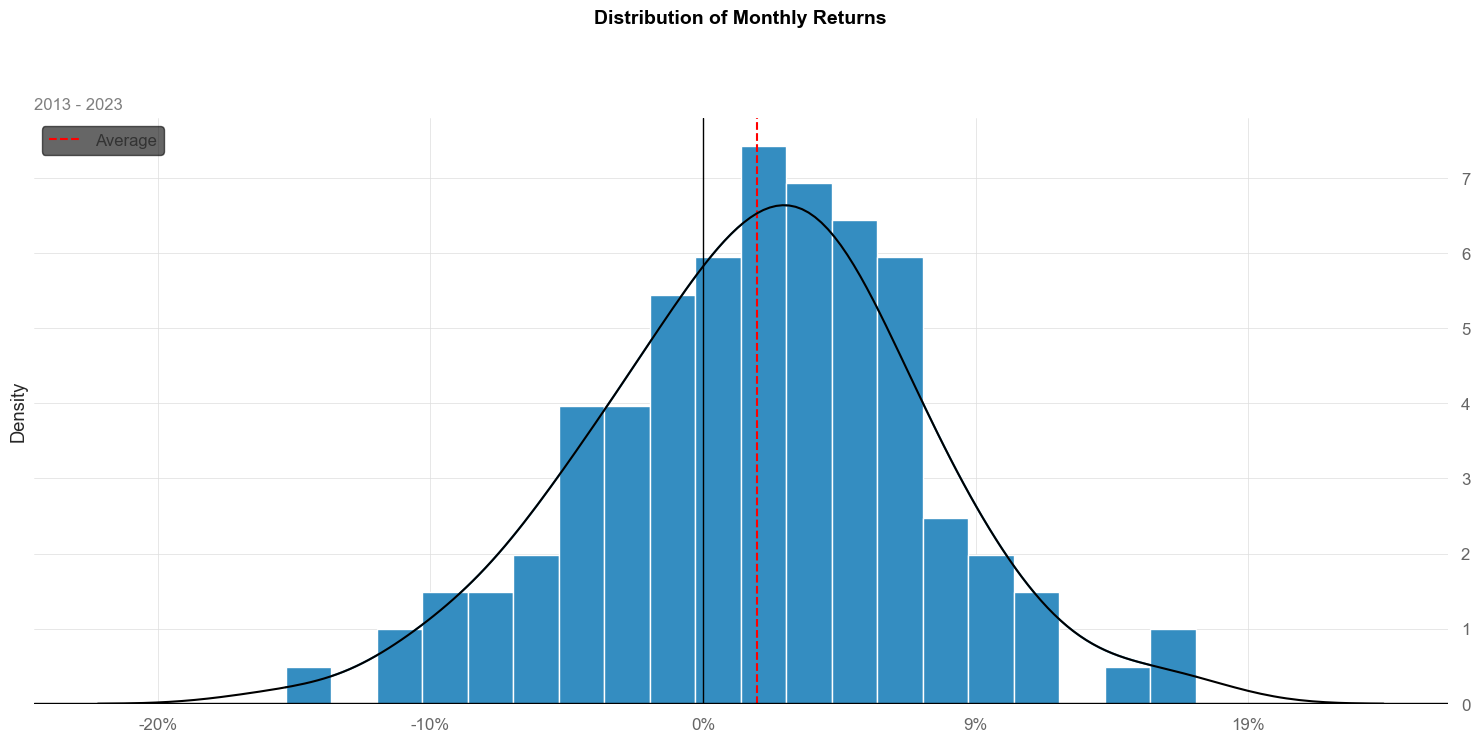

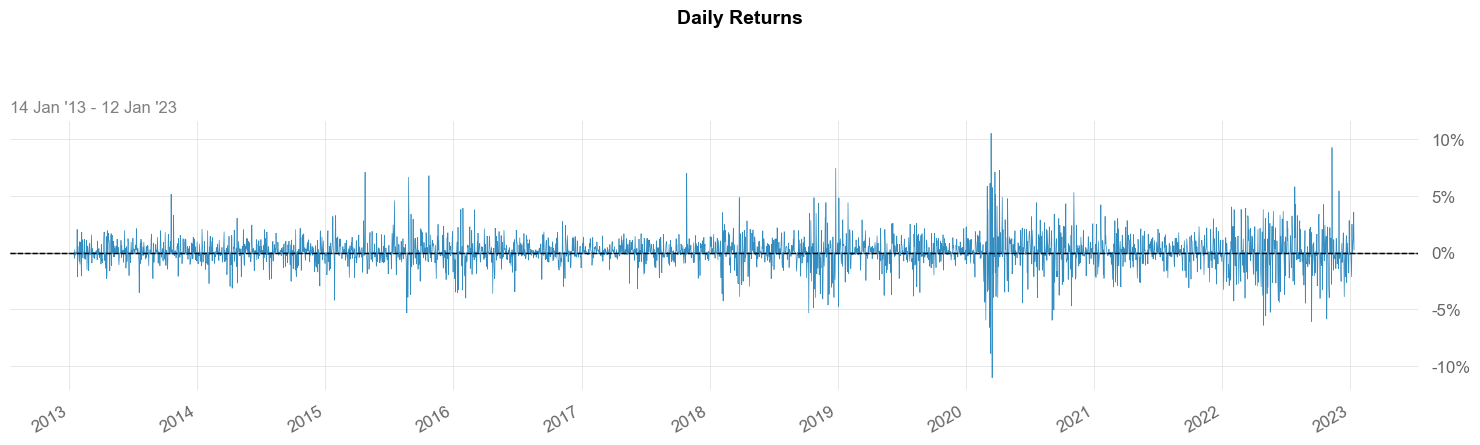

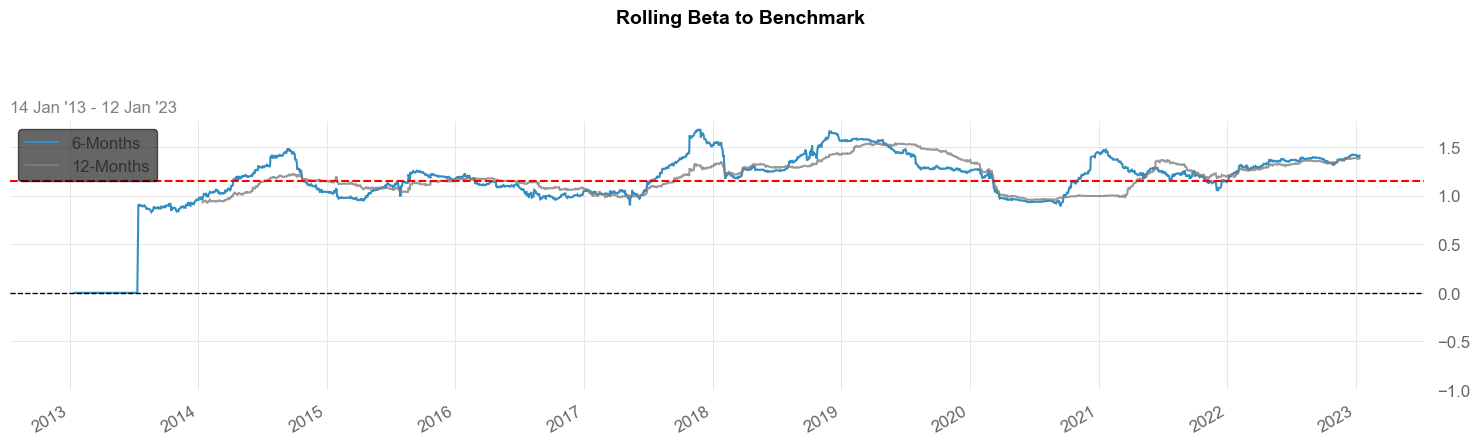

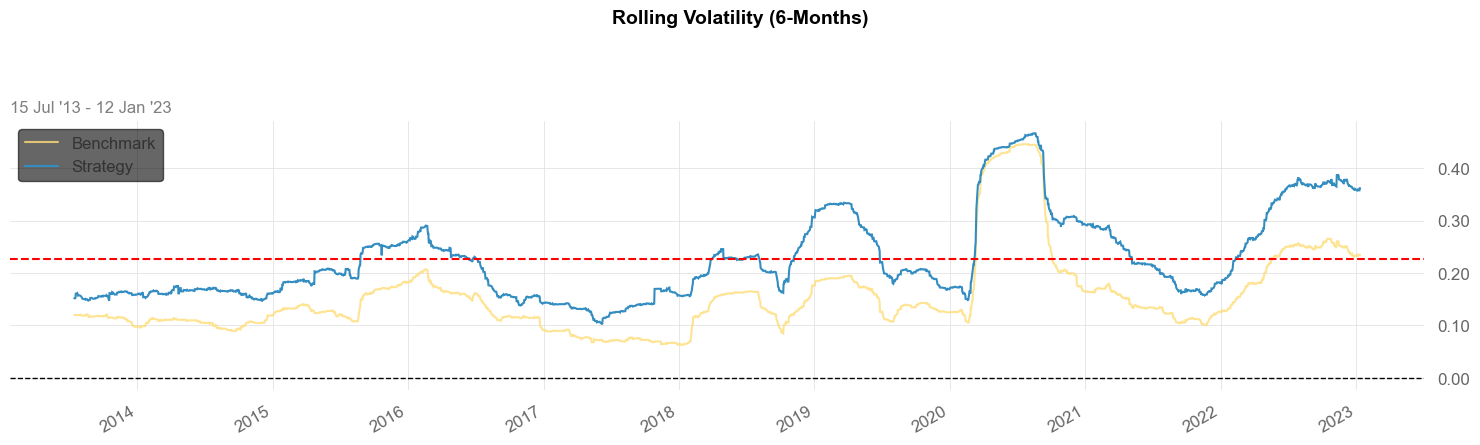

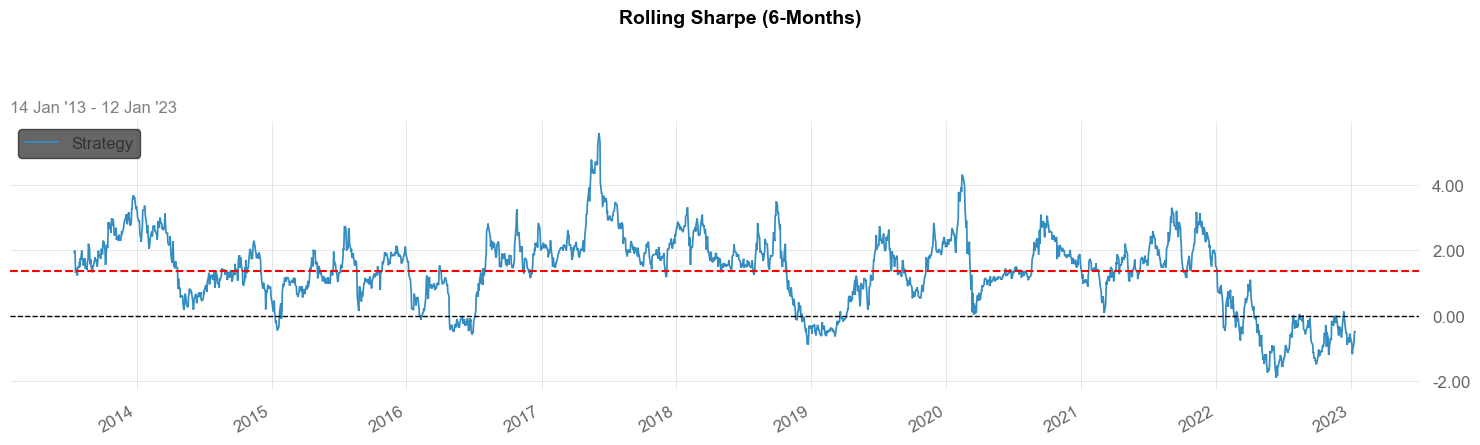

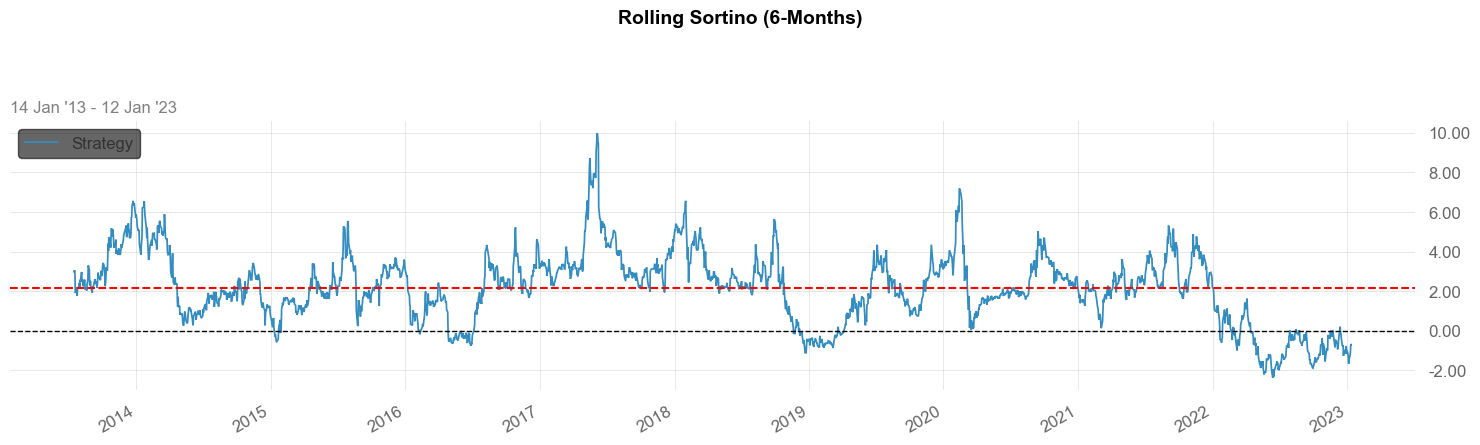

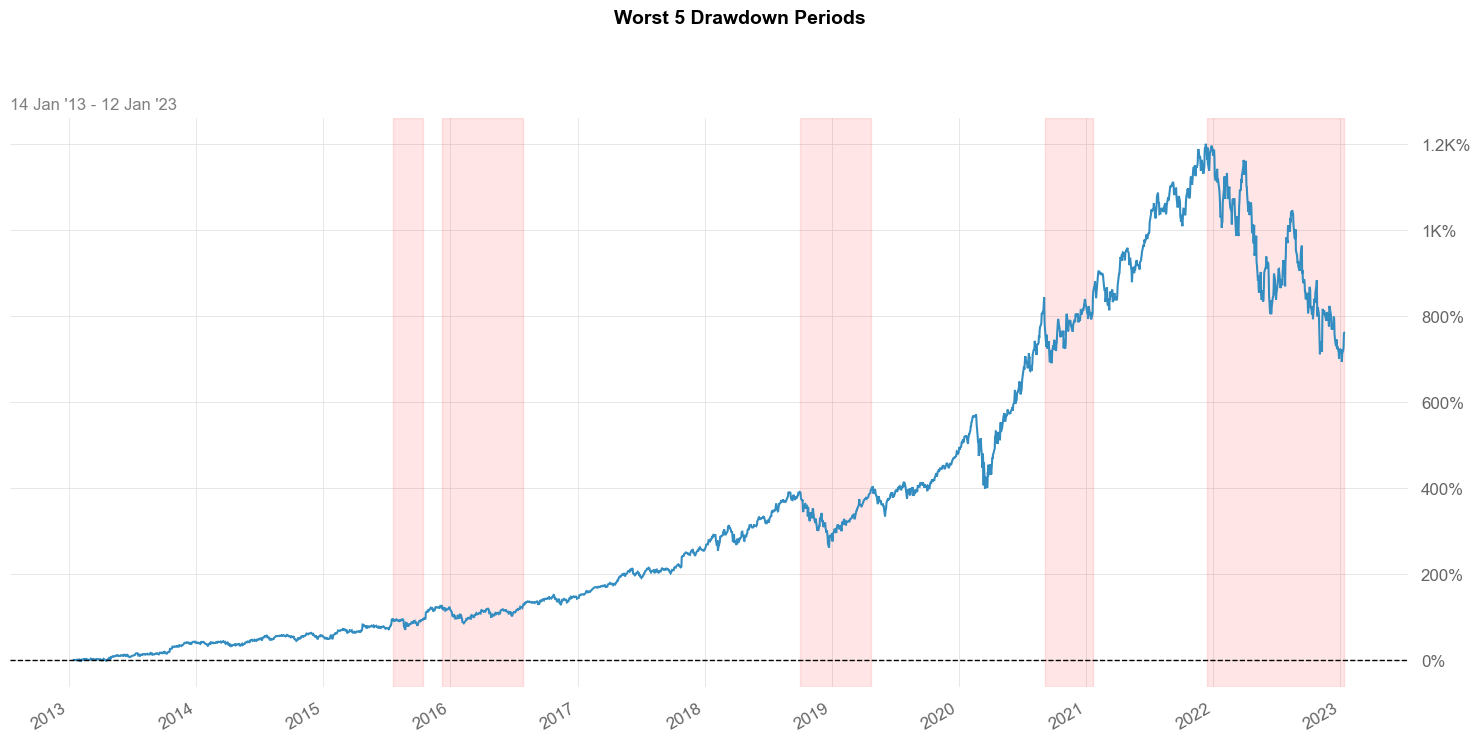

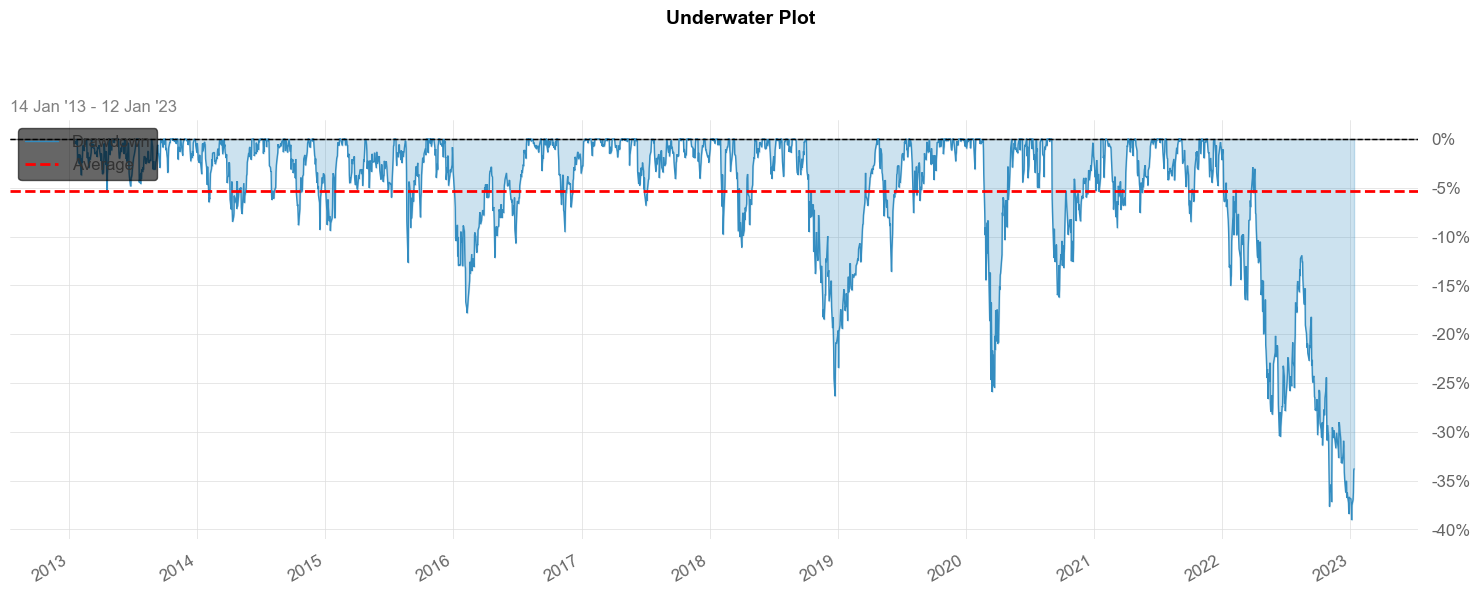

/Users/mikewenner/opt/anaconda3/envs/dev/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


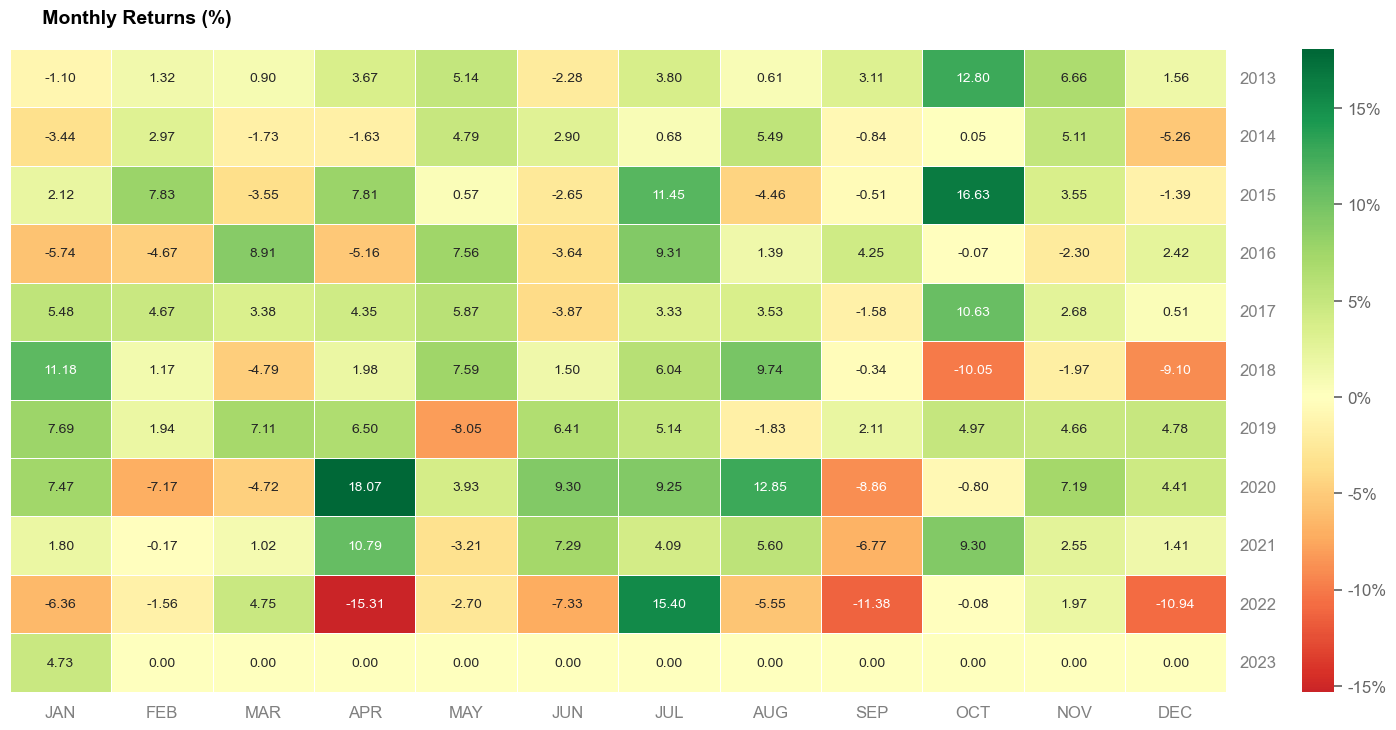

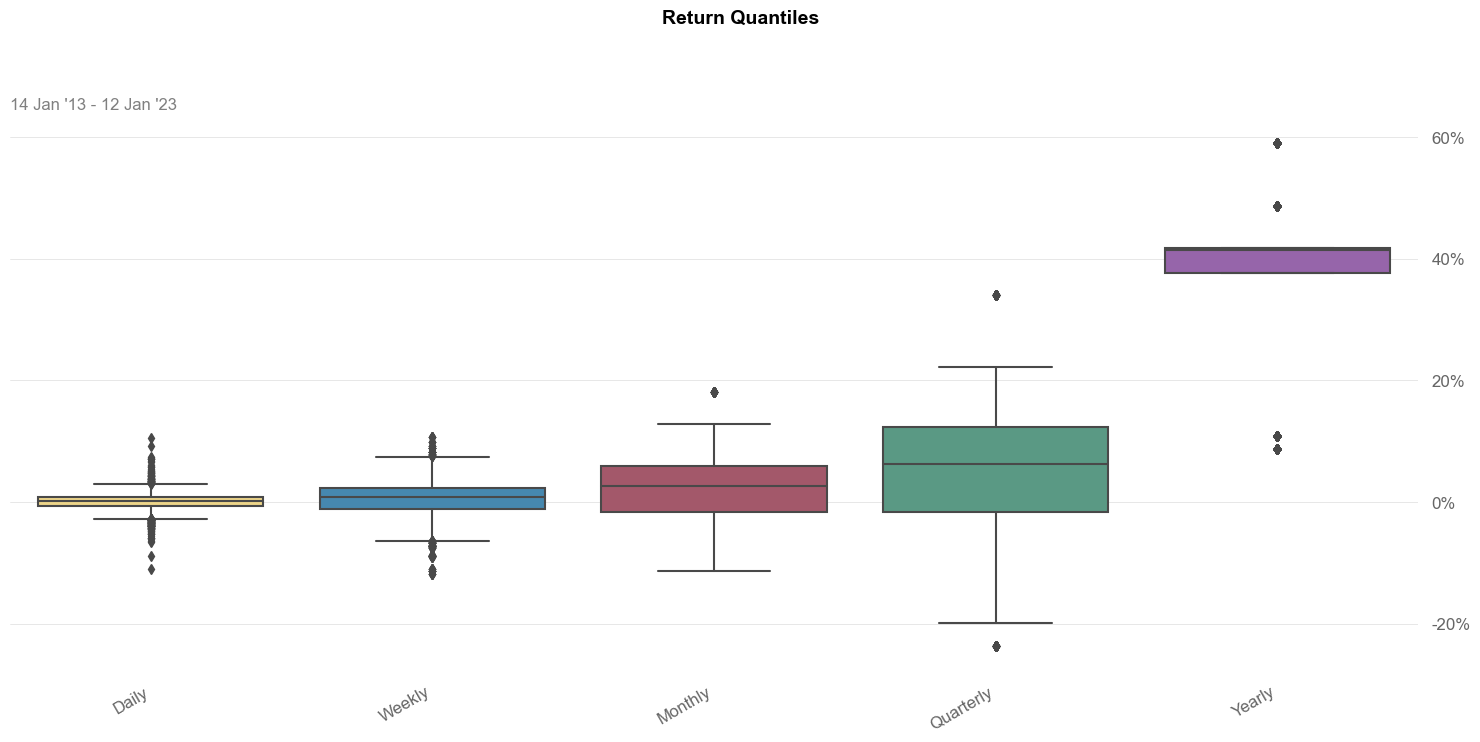

In [14]:
#reports for weighted portfolio vs spy
qs.reports.plots(portfolio, spy_returns, mode="full", figsize=(15,10))